## PYTORCH WORKFLOW - Introduction

#### What we will cover?

**1. Data Preparation** <br>
**2. Build Model (Loss & Optimization)**<br>
**3. Fit the Model**<br>
**4. Making Predictions and Evaluating Model (Inference)**<br>
**5. Saving and Loading Model**<br>
**6. Itegration**<br>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
print(f"Current PyTorch version for thie Environment\t:{torch.__version__}")

Current PyTorch version for thie Environment	:2.5.1


### Machine Learning Essentials:

1. Data needed in numerical representation
2. Model to learn patterns in that numerical representation of data

We will start with a simple **Linear Regression** model formula. Which we know as: `Y = wX + b` , where `Y` is the dependent variable, `X` is the explanatory variable, `w` is the slope **(weight)**, and `b` is the y-intercept **(bias)** of the straight line.<br> So let's start with defining these parameters.

In [3]:
# Define the parameters
weight = 0.6
bias = 0.4

# Create some numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y =  weight * X + bias

print(f"Input Tensor:\t{X[:10]},\n\n Output Tensor:\t {y[:10]}")

Input Tensor:	tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]),

 Output Tensor:	 tensor([[0.4000],
        [0.4120],
        [0.4240],
        [0.4360],
        [0.4480],
        [0.4600],
        [0.4720],
        [0.4840],
        [0.4960],
        [0.5080]])


In [4]:
print(f"Length of X: {len(X)}\nLength of y: {len(y)}")

Length of X: 50
Length of y: 50


In [5]:
# Splitting Data into Train & Test sets
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

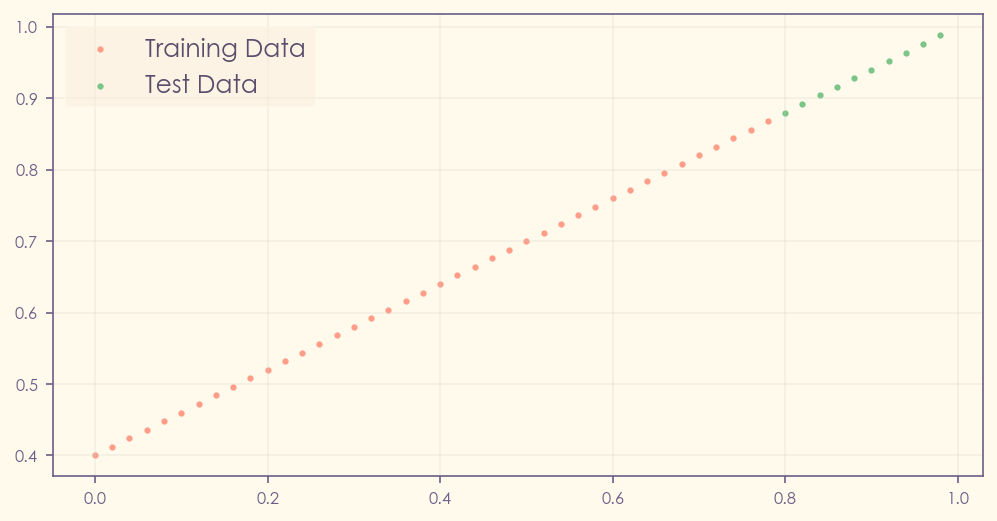

In [6]:
# Visualizing the data
def plot_pred(train_data=X_train,
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=None):
    """
    Plots training data, test data and compare predictons
    """
    # Plot the data
    plt.figure(figsize=(8,4))
    plt.scatter(train_data, train_labels, s=4, label="Training Data")
    plt.scatter(test_data, test_labels, s=4, label="Test Data")
    
    # Plot Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, s=4, label="Predictions")
    plt.legend(prop={"size": 12});
    
plot_pred()

### Let's build the Model with PyTorch
**What Our model will do?**
* Start with random parameters (weight & bias)
* Adjust the random parameters to better represent the ideal ground truth values

**How does the model Adjust?**
* *Gradient Descent*
* *Backpropagation*

In [7]:
# nn contains all of PyTorch's building blocks for Neural networks
from torch import nn

class LinearRegressionModel(nn.Module): # nn.Module is the building bricks of PyTorch
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Define FORWARD method to do computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # returns LR formula

### PyTorch model building Essentials
* `torch.nn` --> Contains all of the buildings for computational graphs or, Neural Network
* `torch.nn.Module` --> The base class of all Neural Network modules.
    * |--> `forward()` method could be overwriten by subclassing the nn module. It requires overwriting the forward computation of the model
* `torch.nn.Parameter` --> Defining the parameters hat our model will use to learn.
* `torch.optim` --> To define the optimizer for better gradient descent

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the module
model_0 = LinearRegressionModel()

# Checkout the params
state_dict = model_0.state_dict()
# Extract the tensor values
tensor_values = list(state_dict.values())
# Assign the tensor values to c and d
c, d = tensor_values
# Convert the first element of c and d to float and format them
a = float(f"{c[0]:.4f}")
b = float(f"{d[0]:.4f}")

In [9]:
# List the named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
print(f"The params value we currently have in tensor is   : ({c[0]:.4f}, {d[0]:.4f})")
print(f"The params value we need to adjust using model is : ({weight:.4f}, {bias:.4f})")

The params value we currently have in tensor is   : (0.3367, 0.1288)
The params value we need to adjust using model is : (0.6000, 0.4000)


#### Making predictions using `torch.inference_mode()`
To check the model's predictive efficiency by considering how well it predict `y_test` based on `X_test`.
When the data are being passed onto the model, it runs through the `forward()` method.

In [11]:
print(f"These are our input data:\n{X_test}\n\nAnd we want our model to adjust the values to these:\n {y_test}")

These are our input data:
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

And we want our model to adjust the values to these:
 tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])


Using the `torch.inference_mode()` method in predicting model gives us the predictions without any saved gradients. In prediction, we do not need the gradients as we do not update the backwardprop while doing predictions. So this mode disables the useful things needed in training and show us only the prediction.

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
"""
Similar things can be done with `no_grad()`
with torch.no_grad():
    y_preds = model_0(X_test)
"""
print(f"These are predicted:\n{y_preds}\n\nDesired ground Truth:\n {y_test}")

These are predicted:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Desired ground Truth:
 tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])


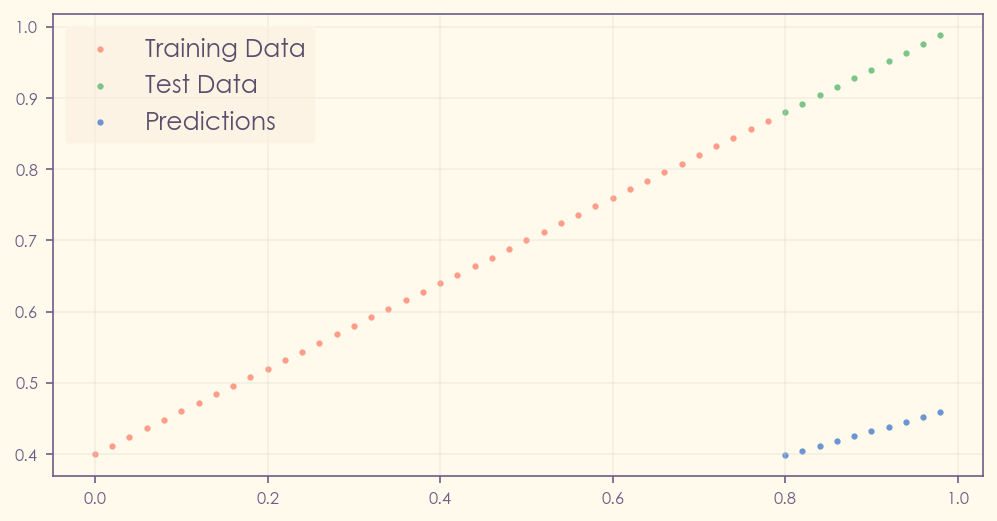

In [13]:
# Let's Visualize the predictions
plot_pred(predictions=y_preds)

## Train the model
The intuition of training a model is to adjust the *unknown* (random) parameters to some *known* (ideal) parameters. In other words, model training is a **better representation of the data from a poor representation**.
##### How to measure poorness between the test data and predicted data? 
* **Loss Function :** A function to measure the wrongness of model's performance on predicting the ideal output. The lower is better!
* **Optimizer :** Given the loss of the model, it adjusts the model's parameters (e.g., weight & bias) to improve loss function.
    * Optimizer will mainly use two important parameters:
        * `params` = Parameters: The model's initial params that will be optimized
        * `lr` = Learning Rate: A hyperparameter that defines the changing step for the parameters.

##### What are the main parts of building a Model?
* **Training Loop :** It will be adjusting the *initial parameters* of the model as it goes through an *iterative process* of prediction and improvment of the loss function towards the ideal output.
* **Testing Loop :** It will be checking the *adjusted parameters* of the model as it goes through an *iterative process* of evaluation and inference of the predicted output in the training loop.

In [14]:
"""
We are going to use the `L1 Loss` or the Mean Absolute Error (MAE)
and the `SGD Optimizer` or the Stochastic Gradient Descent 
for this model.
"""
# Setup a Loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # learning_rate = Hyperparameter

#### Building the Training & Testing loop
Essentials for a training loop:
1. Loop through the data.
2. Forward pass (by overwriting the `forward()` method.
3. Loss calculation (by comparing forward pass predictions with ground truth labels).
4. Loss backward - Move backwards through the graph to calculate the gradients of each of the params of our model with respect to the loss (**backpropagation**).
5. Optimization - Using optimizer to adjust the params to improve the loss (**gradient descent**).

In [15]:
"""1. Loop through the data"""
#Epoch is loops through data
epochs = 1

for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    
    """2. Forward pass"""
    y_pred = model_0(X_train)
    
    """3. Loss Calculation"""
    # Loss between predicted and ground truth
    loss = loss_fn(y_pred, y_train)
    print(f"Loss after `{epoch+1}` EPOCH:\t{loss:.6f}")
    
    """ ## Optimizer Zero Grad : This actually works with 4 & 5"""
    optimizer.zero_grad()
    
    """4. Backpropagation"""
    loss.backward()
    
    """5. Gradient Descent"""
    optimizer.step()

Loss after `1` EPOCH:	0.373881


In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [18]:
# Print the model current state after just 1 epoch
c,d = list(model_0.state_dict().values())
print(f"The params value we previously had in the tensor: ({a}, {b})")
print(f"After just `{epoch+1}` epoch, our model's performance\t: ({c[0]:.4f}, {d[0]:.4f})")
print(f"And we need to adjust the performance to\t: ({weight:.4f}, {bias:.4f})")

The params value we previously had in the tensor: (0.3367, 0.1288)
After just `1` epoch, our model's performance	: (0.3406, 0.1388)
And we need to adjust the performance to	: (0.6000, 0.4000)
